## Stochastic Discount Factor ##

Suppose that consumption growth has lognormal distribution with the possibility of rare disasters:
$$
ln \tilde{g} = 0.02 + 0.02 \tilde{\epsilon} +\tilde{\nu}
$$
Here $\epsilon$ is a standard normal random variable, while $\nu$ is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

Simulate $\epsilon$  with (at least) 104 random draws from standard normal distribution, and simulate $\nu$ with (at least) 104 random draws from standard uniform distribution.

Use the simulated distribution of consumption growth to find the simulated distribution of the pricing kernel for power utility:

$$
\tilde{M} = 0.99\tilde{g}^{-\gamma}
$$

Repeat this process for values of γ in the range from 1 to 4, in increments of 0.1 (or less). (Note that you can reuse the same simulated distribution of consumption growth for all values of γ). 

* Calculate μM and σM for each value of γ, and plot σM/μM (on the vertical axis) vs γ (on the horizontal axis).

* Find the smallest value of γ (in your data) for which σM/μM > 0.4. Explain (in words, without using any mathematical  equations or formulas) the economic significance of this result.
Economic Significance:

* H–J bound: volatility ratio of pricing kernel must exceed Sharpe ratio of 0.4 for US stock market

* For investor with power utility of consumption, investor's coefficient of relative risk aversion (γ) affects volatility of pricing kernel ⇒ H–J bound sets lower bound on γ

* H–J bound is satisfied for reasonable value of γ when probability distribution of consumption growth includes rare disasters ⇒ no equity premium puzzle

In [1]:
import numpy as np
import scipy as sp
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

## Consumption Growth Function ##

$ln({\tilde{g}}) = 0.02 + 0.02{\tilde{\epsilon}} + {\tilde{\nu}}$

${\tilde{\epsilon}}$ is a standard normal random variable.

${\tilde{\nu}}$ is is an independent random variable that has value of either zero (with probability of 98.3%) or ln(0.65) (with probability of 1.7%).

In [2]:
no_of_draws = 100000

In [3]:
epsilon = np.random.standard_normal(no_of_draws)
epsilon

array([ 0.63255232,  2.3041144 , -0.53884753, ..., -0.10034935,
       -0.0997266 , -1.565817  ])

In [4]:
nu = np.random.uniform(0, 1, no_of_draws)
for idx, elem in enumerate(nu):
    if elem <= 0.017:
        nu[idx] = np.log(0.65)
    else:
        nu[idx] = 0

In [5]:
epsilon_nu_pair = list(zip(epsilon, nu))

In [6]:
g = []
for idx, elem in enumerate(epsilon_nu_pair):
    g.append(np.exp(0.02 + 0.02 * elem[0] + elem[1]))

## Pricing kernel for power utility ##
${\tilde{M}} =  0.99 {\tilde{g}}^{-\gamma}$

In [8]:
gamma = np.arange(1, 4.1, 0.10)

In [9]:
m_des_dict = {}
for possible_gamma in gamma:
    m = []
    for possible_g in g:
        m.append(0.99 * possible_g**-possible_gamma)
    m = np.array(m)
    m_des_dict[round(possible_gamma, 2)] = m.std() / m.mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


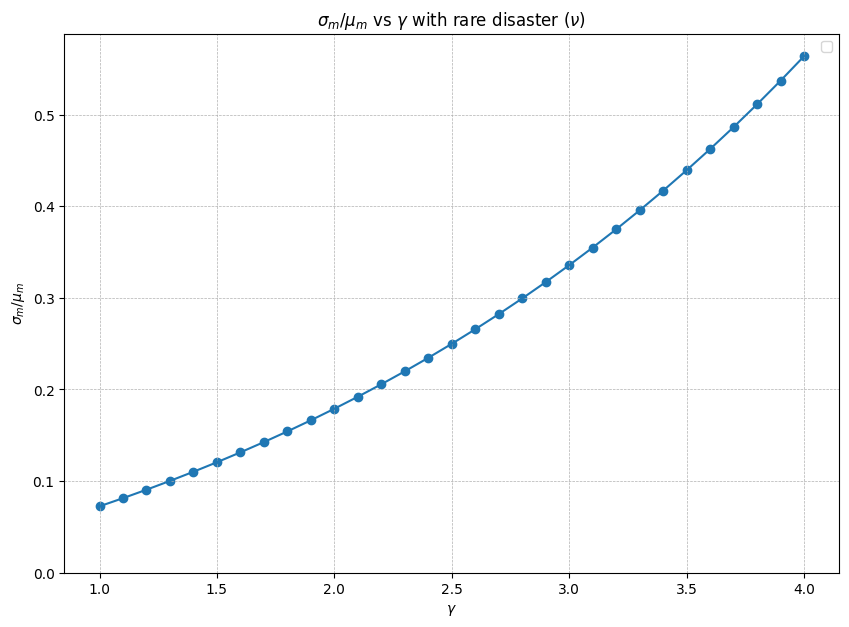

In [10]:
f1, ax1 = plt.subplots(1)
# f1.set_figheight(7)
# f1.set_figwidth(10)
ax1.scatter(m_des_dict.keys(), m_des_dict.values())
ax1.plot(m_des_dict.keys(), m_des_dict.values())
ax1.set_ylim(ymin=0)
# ax1.set_xlim(xmin=0)
ax1.set_xlabel(r"$\gamma$")
ax1.set_ylabel(r"$\sigma_m/\mu_m$")
# ax1.xaxis.set_major_locator(plt.MultipleLocator(0.025))
ax1.set_title(r"$\sigma_m/\mu_m$ vs $\gamma$ with rare disaster ($\nu$)")
ax1.yaxis.set_major_locator(plt.MultipleLocator(0.1))
# ax1.yaxis.set_major_formatter(ticker.FormatStrFormatter("%.1f %%"))
ax1.grid(linestyle="--", linewidth=0.5)
ax1.legend()
plt.show(f1)
f1.savefig("f1.jpg")

In [12]:
m_des_df = pd.DataFrame(m_des_dict.items(), columns=["gamma", "ratio"])
m_des_df = m_des_df.set_index("gamma")
# print(m_des_df.to_latex())

\begin{tabular}{lr}
\toprule
{} &     ratio \\
gamma &           \\
\midrule
1.0   &  0.072469 \\
1.1   &  0.081358 \\
1.2   &  0.090598 \\
1.3   &  0.100202 \\
1.4   &  0.110185 \\
1.5   &  0.120564 \\
1.6   &  0.131354 \\
1.7   &  0.142571 \\
1.8   &  0.154232 \\
1.9   &  0.166354 \\
2.0   &  0.178956 \\
2.1   &  0.192056 \\
2.2   &  0.205672 \\
2.3   &  0.219825 \\
2.4   &  0.234533 \\
2.5   &  0.249818 \\
2.6   &  0.265700 \\
2.7   &  0.282201 \\
2.8   &  0.299344 \\
2.9   &  0.317149 \\
3.0   &  0.335641 \\
3.1   &  0.354842 \\
3.2   &  0.374777 \\
3.3   &  0.395470 \\
3.4   &  0.416945 \\
3.5   &  0.439228 \\
3.6   &  0.462343 \\
3.7   &  0.486317 \\
3.8   &  0.511176 \\
3.9   &  0.536945 \\
4.0   &  0.563651 \\
\bottomrule
\end{tabular}



C:\Users\kilohp\AppData\Local\Temp\ipykernel_14180\2603744295.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(m_des_df.to_latex())


In [13]:
min_gamma = 5.0  # because max gamma is 4
for gamma, val in m_des_dict.items():
    # print(f"{float(gamma)} and {val}")
    if val > 0.4:
        if float(gamma) < min_gamma:
            min_gamma = float(gamma)
            print(f"minimum gamma is {min_gamma} with value equals {round(val,4)}")
            break

1.0 and 0.07246935051717601
1.1 and 0.08135825402018282
1.2 and 0.090597535770584
1.3 and 0.10020161005371324
1.4 and 0.11018536423291792
1.5 and 0.12056416688441739
1.6 and 0.13135387537811524
1.7 and 0.14257084281847934
1.8 and 0.15423192425283616
1.9 and 0.1663544820474009
2.0 and 0.17895639032409955
2.1 and 0.19205603834375937
2.2 and 0.20567233271358315
2.3 and 0.21982469828902418
2.4 and 0.2345330776322819
2.5 and 0.24981792888171225
2.6 and 0.2657002218785438
2.7 and 0.2822014323894985
2.8 and 0.2993435342563205
2.9 and 0.31714898929590685
3.0 and 0.33564073476784206
3.1 and 0.35484216821977205
3.2 and 0.3747771295153592
3.3 and 0.3954698798446993
3.4 and 0.4169450775132086
minimum gamma is 3.4 with value equals 0.4169
